In [1]:
import pandas as pd

In [2]:
import sys
import os


notebook_dir = os.getcwd()

 
project_root = os.path.abspath(os.path.join(notebook_dir, '../../..'))


src_path = os.path.join(project_root, 'src')
sys.path.append(src_path)

In [3]:
from data_cleaning import load_data, clean_missing_values, remove_duplicates, convert_columns_to_datetime, normalize_columns,check_missing_values, check_duplicates, check_negative_values
#from visualization import plot_histogram, plot_scatter, plot_correlation_heatmap, plot_pairplot, plot_time_series #, plot_time_series_monthly, plot_time_series_hourly
from visualization import plot_cleaning_impact, plot_histogram, plot_scatter, plot_correlation_heatmap, plot_pairplot, plot_time_series, plot_cleaning_impact, plot_wind_rose, plot_histograms, plot_bubble_chart


ImportError: cannot import name 'convert_columns_to_datetime' from 'data_cleaning' (c:\Users\HP\Desktop\week 0\solar-data-analysis\src\data_cleaning.py)

In [ ]:
# Define the absolute file path to the dataset
file_path = r'C:\Users\HP\Desktop\EDA-week-0\data\benin-malanville\benin-malanville.csv'

# Load the data
df_benin = load_data(file_path)

# Display the first few rows of the dataset
df_benin.head()

Data loaded successfully from C:\Users\HP\Desktop\EDA-week-0\data\benin-malanville\benin-malanville.csv


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [ ]:
df_benin.shape

(525600, 19)

In [ ]:
df_benin.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [ ]:
df_benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [ ]:
df_benin.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [ ]:

# check missing values
missing_info = check_missing_values(df_benin)
print(f"Missing Values Info:\n", missing_info)

Missing Values Info:
                Missing Values  Percentage
Timestamp                   0         0.0
GHI                         0         0.0
DNI                         0         0.0
DHI                         0         0.0
ModA                        0         0.0
ModB                        0         0.0
Tamb                        0         0.0
RH                          0         0.0
WS                          0         0.0
WSgust                      0         0.0
WSstdev                     0         0.0
WD                          0         0.0
WDstdev                     0         0.0
BP                          0         0.0
Cleaning                    0         0.0
Precipitation               0         0.0
TModA                       0         0.0
TModB                       0         0.0
Comments               525600       100.0


In [ ]:
clean_missing_values(df_benin, strategy='drop')

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments


In [ ]:
missing_info = check_missing_values(df_benin)
print(f"Missing Values Info:\n", missing_info)

Missing Values Info:
                Missing Values  Percentage
Timestamp                   0         NaN
GHI                         0         NaN
DNI                         0         NaN
DHI                         0         NaN
ModA                        0         NaN
ModB                        0         NaN
Tamb                        0         NaN
RH                          0         NaN
WS                          0         NaN
WSgust                      0         NaN
WSstdev                     0         NaN
WD                          0         NaN
WDstdev                     0         NaN
BP                          0         NaN
Cleaning                    0         NaN
Precipitation               0         NaN
TModA                       0         NaN
TModB                       0         NaN
Comments                    0         NaN


In [ ]:
# Check for duplicates
duplicates = check_duplicates(df_benin)
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


In [ ]:

# Check for negative values in specific columns (e.g., GHI, DNI, DHI)
negative_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
negative_info = check_negative_values(df_benin, negative_columns)
print("\nNegative Values Info:\n", negative_info)


Negative Values Info:
    Column  Negative Count
0     GHI               0
1     DNI               0
2     DHI               0
3    ModA               0
4    ModB               0
5      WS               0
6  WSgust               0


In [ ]:
import pandas as pd
import numpy as np

def z_score_analysis(df, column, threshold=3):
    
    mean = df[column].mean()
    std_dev = df[column].std()
    
    
    df['Z-Score'] = (df[column] - mean) / std_dev
    
 
    df['Outlier'] = np.abs(df['Z-Score']) > threshold
    
    return df


df_benin = z_score_analysis(df_benin, column='ModA', threshold=3)


print(df_benin[['Timestamp', 'ModA', 'Z-Score', 'Outlier']])


#Data Visualization

c:\Users\HP\Desktop\week 0\solar-data-analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


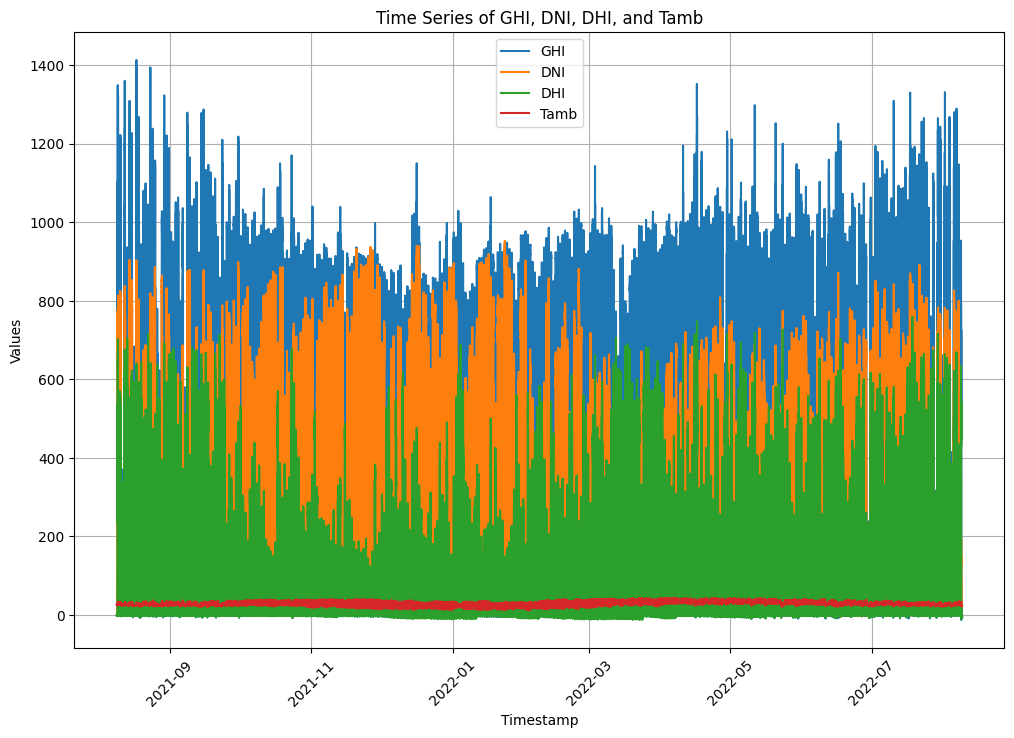

In [ ]:

# Define the columns to plot
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

# Plot the time series
plot_time_series(df_benin, columns=columns_to_plot, time_column='Timestamp')

c:\Users\HP\Desktop\week 0\solar-data-analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


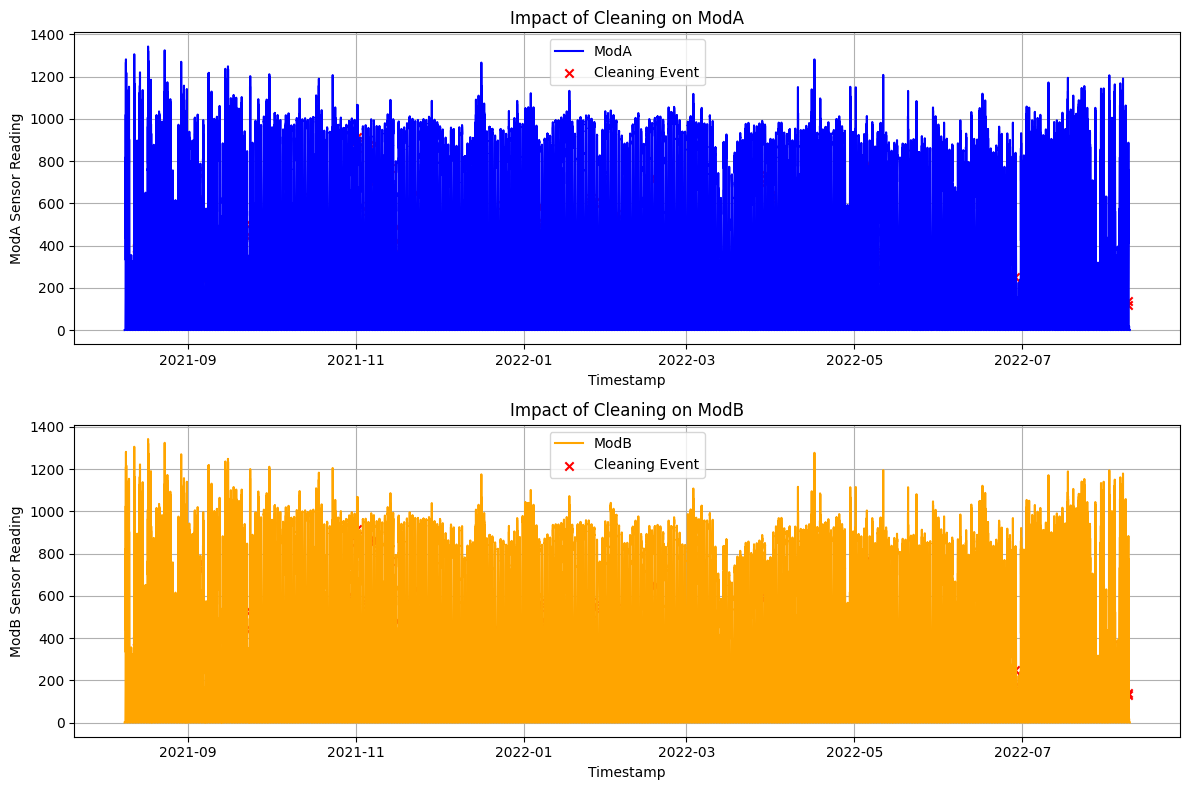

In [ ]:
# Step 3: Evaluate the Impact of Cleaning on ModA and ModB over time
plot_cleaning_impact(df_benin, time_column='Timestamp')

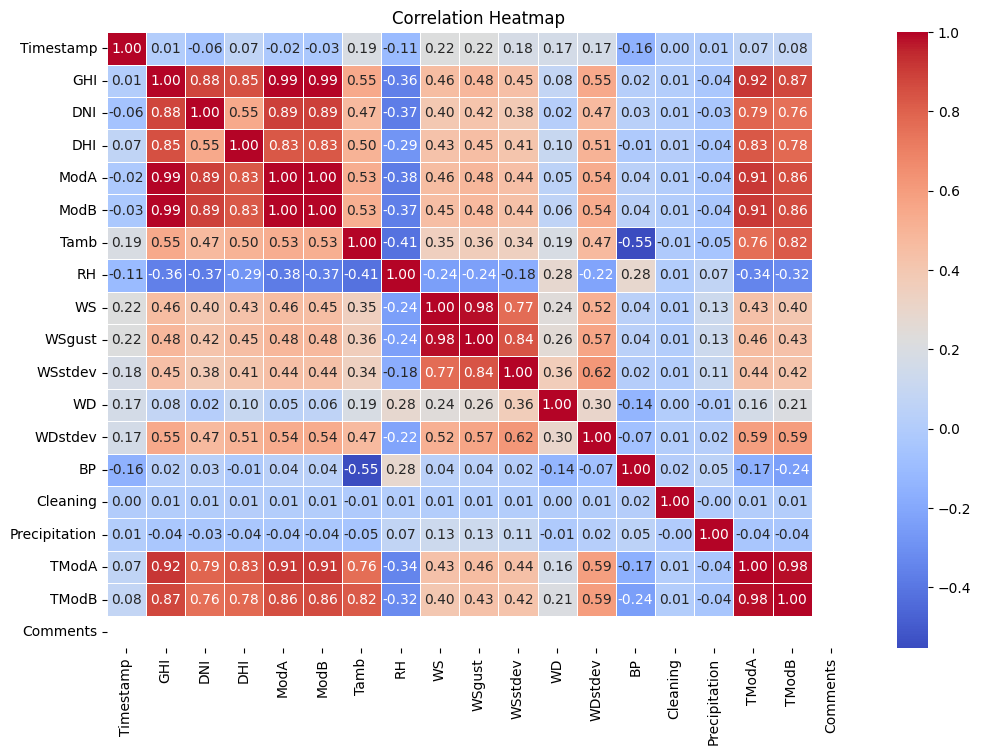

In [ ]:
# Step 4: Correlation Analysis for Solar Radiation, ModA, ModB, and Temperatures
# Visualize the correlation heatmap
plot_correlation_heatmap(df_benin)

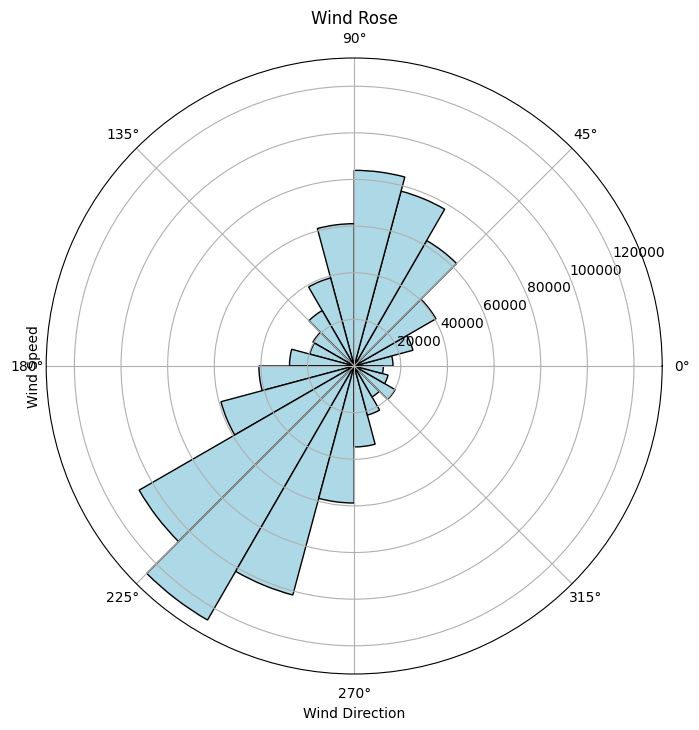

In [ ]:
# Step 5: Wind Analysis using Wind Rose (Wind Direction and Speed)
plot_wind_rose(df_benin, wind_direction_column='WD', wind_speed_column='WS')

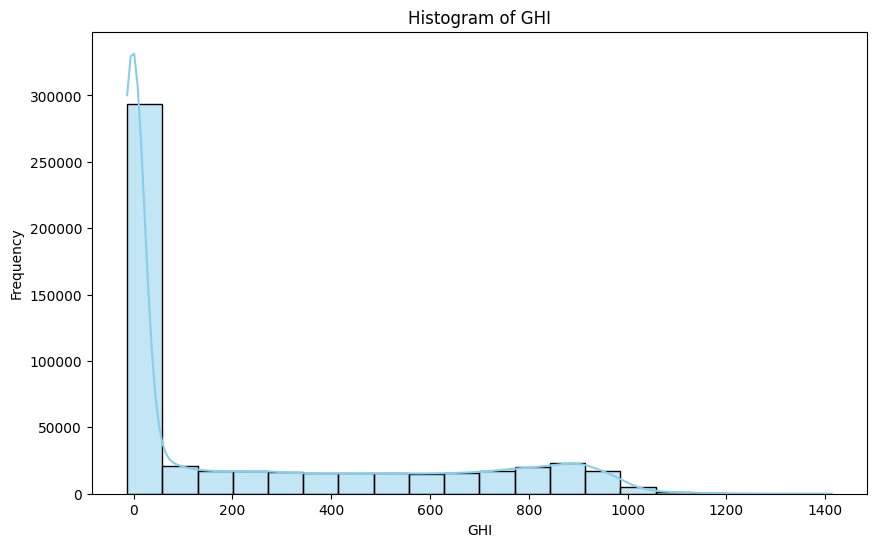

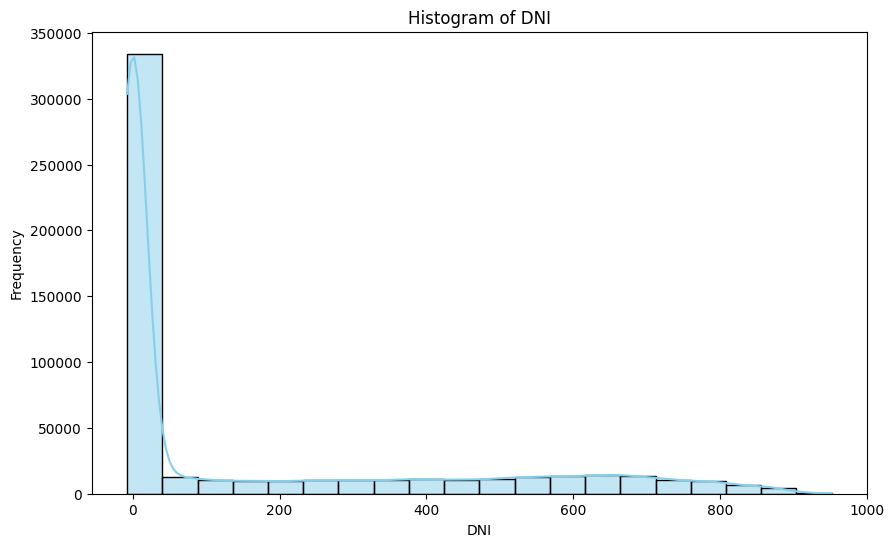

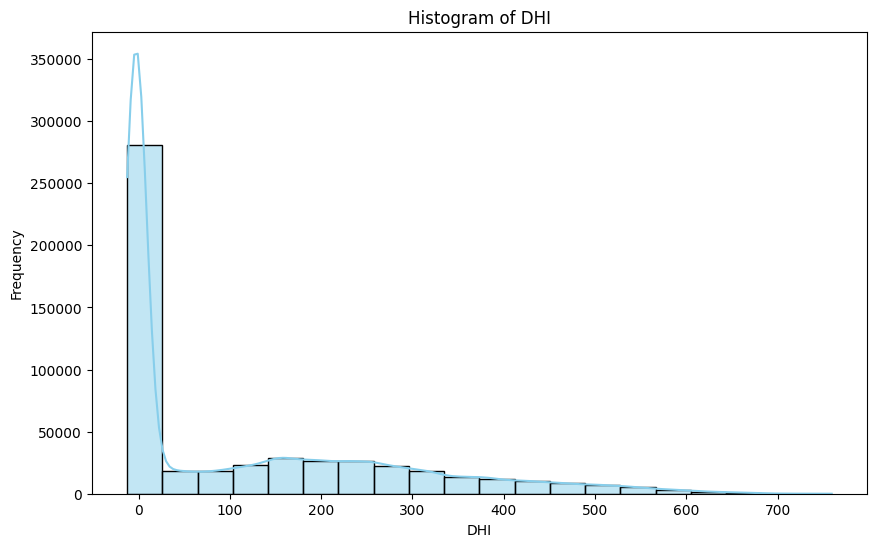

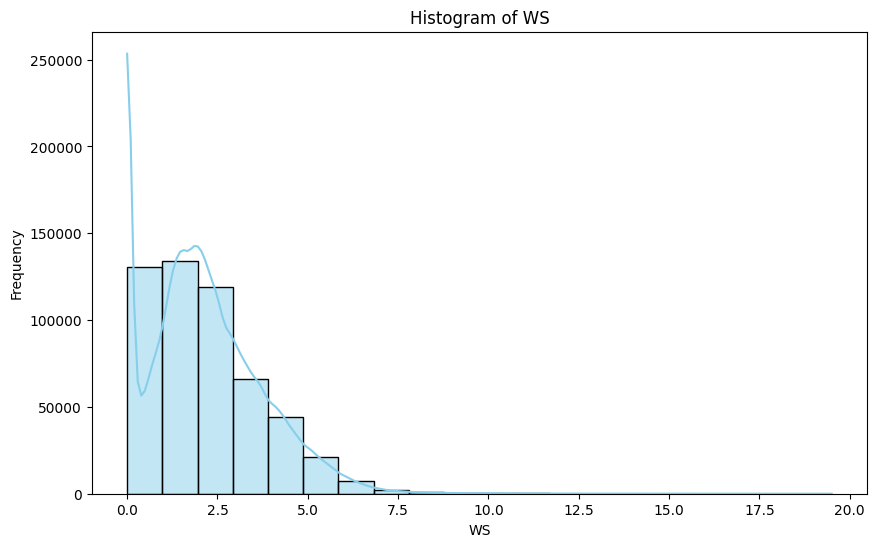

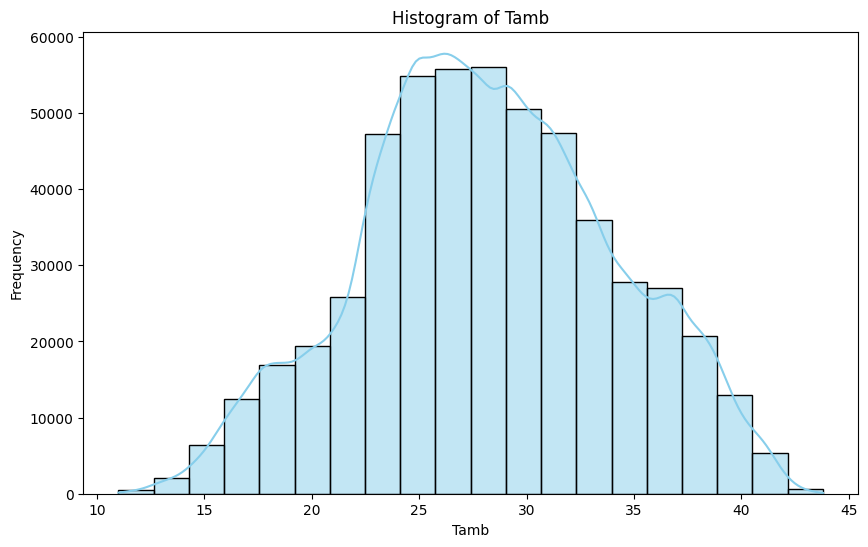

In [ ]:
# Step 6: Histograms for GHI, DNI, DHI, WS, and Tamb
plot_histograms(df_benin)

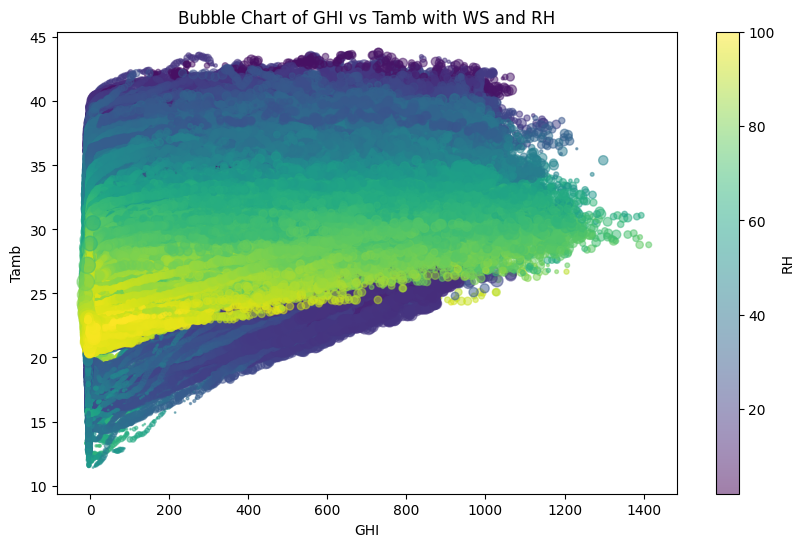

In [ ]:
# Step 7: Bubble Chart to explore complex relationships between GHI, Tamb, WS, and RH
plot_bubble_chart(df_benin, x_column='GHI', y_column='Tamb', size_column='WS', color_column='RH')